# 앙상블

- 여러 머신러닝 모델을 결합하여 더 좋은 모델을 얻는 방법

- 앙상블의 종류
    - 보팅
    - 배깅
    - 부스팅

## 보팅 (Voting)
<img src="./image/voting.png">

- 여러 개의 분류기가 투표를 통해 최종 예측 겨로가를 결정

- 종류

- 하드 보팅(Hard Vogting)
    - 다수의 분류기가 예측한 결과값을 최종 결과로 선정
- 소프트 보팅
    - 모든 분류기가 예측한 결정 확률이 평균이 가장 높은 결과값을 최종 결과로 선정

## 배깅
<img src="./image/bagging.png">

- 데이터 샘플링 을 통해 모델을 학습시키고 결과를 집계하는 방법
    - bootstrap
        - 데이터가 조금씩은 편향되도록 샘플링하는 기법
        - 분산이 높은 모델의 과대적합 위험을 줄이는 효과가 있음

- 모두 같은 유형의 알고리즘 기반의 분류기를 사용

  
- 데이터 분할 시 중복을 허용

  
- 예시 : 랜덤포레스트
    - 과대적합되기 쉬운 의사결정나무의 과대적합을 줄여 성능 높임

## 부스팅

<img src="./image/boosting.png">

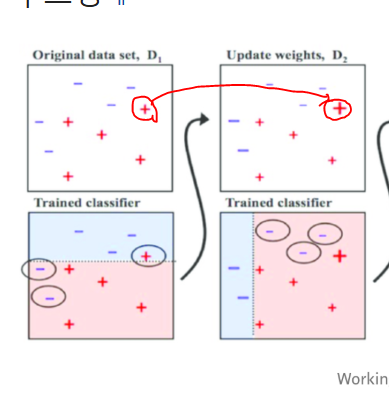

미묘하게 커진 모습~ (압박했다는거임)

- 여러 개의 분류기가 순차적으로 학습을 수행

- 이전 분류기의 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록 다음 분류기에 가중치를 부여 하면서 학습과 예측 진행

- 계속하여 분류기에 가중치를 부스팅하며 학습을 진행하기 때문에 부스팅 방식이라고 그럼

  
- 배깅에 비해 성능이 좋지만 속도 느림, 과대 적합 발생할 가능성이 더 높음

- XGBoost, LightGBM

# 랜덤포레스트

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv("./data/wine.csv")

In [3]:
df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
x = df.drop("class", axis =1)
y = df["class"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 33
)

In [6]:
# SKLEARN에서의 랜덤포레스트는 기본 100개의 의사결정나무를 합친다

In [8]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 33)

In [9]:
# 교차검증 진행
scores = cross_validate(
    rf,
    x_train,
    y_train,
    return_train_score= True, # 교차 검증시 훈련 세트에 대한 점수도 함께 반환
    n_jobs = -1
)

In [10]:
print(np.mean(scores["train_score"]))
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9975466314172111
0.8910922114459169
0.2188809871673584


- 꽤 성능이 좋군~

- 랜덤포레스트는 의사결정나무의 앙상블이기 때문에 의사결정나무에서 제공하는 주요 매개변수는 모두 제공함
    - 특성중요도 계산도 가능
        - 랜덤포레스트의 특성 중요도는 각 의사결정나무의 특성 중요도를 취합

In [11]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=33)

In [12]:
rf.feature_importances_

array([0.23114561, 0.50121347, 0.26764091])

- 의사결정나무에 비해 두 번째 특성인 sugar 의 중요도가 감소하고 alcohol 과 PH 중요도가 상승함
- 랜포는 하나의 특성에 과돟게 집중되지 않고 더 많은특성이 훈련에 기여할 기회를 얻음
- 과대적합 줄어듦 일반화 성능 높힘

In [17]:
rf = RandomForestClassifier(
    oob_score=True, # out of back : 한번도사용안한친구의점수(일반화성능과 비슷하게 나온다)
    n_jobs =-1, random_state = 33)
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=33)

In [18]:
rf.oob_score_

0.895516644217818

- out of bag 샘플
- 부트스트랩 샘플에 포함되지 ㅇ낳아 훈련에 사용되지 않은 샘플
- out of bag 검증 세트처럼 이용 트리 평가 가능

# 엑스트라 트리

- 랜덤 포레스트와 매우 유사함
    - 기본적으로 100개의 의사결정나무를 훈련
    - 의사결정나무가 제공하는 대부분의 매개변수를 지원

- 랜덤 포레스트와의 차이점
    - 부트스트랩 샘플을 사용하지 않음
    - 전체 훈련 세트를 사용함
- 노드를 분할할 때 가장 좋은 분할을 찾느것이 아니라 무작위로 분할함
    - 하나의 의사결정 나무에서 특성을 무작위로 분할 한다면 성능이 낮아짐
    - 하지만 많은 트리를 앙상블하기 때문에 과대적합을 방지하고 검증 세트 점수를 높이는 효과가 나타남

In [20]:
et = ExtraTreesClassifier(n_jobs = -1, random_state= 33)
scores = cross_validate(et, x_train, y_train, return_train_score=True, n_jobs = -1)

print(np.mean(scores["train_score"]))
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"])) # 거의 절반정도 차이난다 (3시간과 1시간 차이라고 생각)

0.9975466314172111
0.8880128822092249
0.1746821880340576


- 예제에서는 독립변수가 많지 않아서 랜덤포레스트와 차이가 크지 않음

- 일반적으로 엑스트라가 무장위성이 더 크기 때문에 랜덤포레스트보다 더 많은 트리를 훈련해야함

- 하지만 랜덤하게 노드를 분할하기 때문에 계산속도가 빠름

In [22]:
# 엑스트라 트리도 특성 중요도 제공공공
et.fit(x_train, y_train)
print(et.feature_importances_)

[0.18972323 0.52389243 0.28638433]


# 그레디언트 부스팅 (gradient Boosting)

- 깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블하는 기법

- 사이킷런의 GradintBoostingClassifier 는 기본적으로 깊이가 3인 결정 트리를 100개 사용

- 깊이가 얕은 결정 트리를 사용하여 과대적합을 방지할 수 있고 높은 일반화 성능을 기대할 수있음

In [24]:
gb = GradientBoostingClassifier(random_state=33)
scores = cross_validate(
    gb,
    x_train,
    y_train, 
    return_train_score= True,
    n_jobs = -1
)


In [25]:
print(np.mean(scores["train_score"]))
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.88469311139506
0.8699252239579476
0.269211483001709


- 그레디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 강함

In [27]:
gb = GradientBoostingClassifier(
    random_state=33,
    n_estimators= 1500,
)
scores = cross_validate(
    gb,
    x_train,
    y_train,
    return_train_score=True,
    n_jobs=-1
    
)
print(np.mean(scores["train_score"]))
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9555514941851243
0.8728111349670542
4.385410261154175


In [28]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=1500, random_state=33)

In [29]:
gb.feature_importances_

array([0.16891768, 0.67312019, 0.15796213])